# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:11<00:00, 5.16KFile/s] 


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

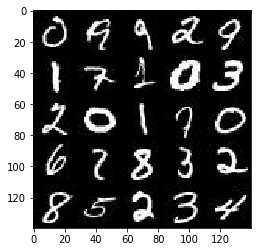

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

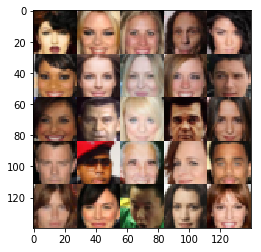

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    # Real input images placeholder
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),
                                 name = "input_real")
    
    # Z input placeholder
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name = "input_z")
    
    # Learning rate placeholder
    learning_rate = tf.placeholder(tf.float32, name = "learning_rate")
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [39]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    """
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(0.2 * x1, x1)
        # 16x16x32
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits
    
    """
    with tf.variable_scope("discriminator", reuse = reuse):
        
        #input layer is 28x28x4
        x1 = tf.layers.conv2d(images, 64, 4, strides = 2, padding = 'same')
        relu1 = tf.maximum(0.2*x1, x1)
        # 14x14x64
        
        # second layer
        x2 = tf.layers.conv2d(relu1, 128, 4, strides = 2, padding = 'same')
        bn2 = tf.layers.batch_normalization(x2, training = True)
        relu2 = tf.maximum(0.2*bn2, bn2)
        # 7x7x128
        
        # flatten it
        flat = tf.reshape(relu2, (-1, 7*7*128))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
    return output, logits
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [35]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope("generator", reuse = not is_train):
        # first fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(0.2*x1, x1)
        # 7*7*512 now
        
        # second fully connected layer
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides = 2, padding = 'same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(0.2*x2, x2)
        # 14*14*256 now
        
        # output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides = 2, padding = 'same')
        # 28*28*3 now
        
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [28]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse = True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
                  logits = d_logits_real, labels = tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
                  logits = d_logits_fake, labels = tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
             logits = d_logits_fake, labels = tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [54]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # get the trainable_variables, split into G and D parts
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith("generator")]
    d_vars = [var for var in t_vars if var.name.startswith("discriminator")]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):  
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    
    """
    # optimize
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list = d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list = g_vars)
    """
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [77]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, is_train=False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

In [78]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, learning = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    
    # TODO: Train Model 
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                # sample random noise for G
                batch_z = np.random.uniform(-1, 1, size = (batch_size, z_dim))
                
                # run optimizers
                _ = sess.run(d_opt, feed_dict = {input_real: batch_images, input_z: batch_z})
               # _ = sess.run(g_opt, feed_dict = {input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, learning: learning_rate, input_real: batch_images}) 
                if steps % 10 == 0:
                    # at the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                if steps % 100 == 0:
                    show_generator_output(sess, 1, input_z, data_shape[3], data_image_mode)
                
                

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.4047... Generator Loss: 0.0467
Epoch 1/2... Discriminator Loss: 3.4762... Generator Loss: 0.0541
Epoch 1/2... Discriminator Loss: 3.3648... Generator Loss: 0.0617
Epoch 1/2... Discriminator Loss: 3.1329... Generator Loss: 0.1005
Epoch 1/2... Discriminator Loss: 2.7814... Generator Loss: 0.1652
Epoch 1/2... Discriminator Loss: 2.2319... Generator Loss: 0.3749
Epoch 1/2... Discriminator Loss: 2.6376... Generator Loss: 0.3138
Epoch 1/2... Discriminator Loss: 2.5371... Generator Loss: 0.3443
Epoch 1/2... Discriminator Loss: 2.0344... Generator Loss: 0.4736
Epoch 1/2... Discriminator Loss: 2.0555... Generator Loss: 0.4468


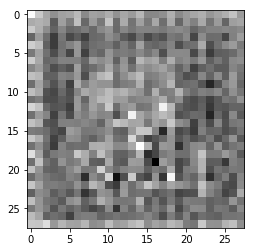

Epoch 1/2... Discriminator Loss: 1.9171... Generator Loss: 0.4811
Epoch 1/2... Discriminator Loss: 1.7880... Generator Loss: 0.5044
Epoch 1/2... Discriminator Loss: 1.7384... Generator Loss: 0.5464
Epoch 1/2... Discriminator Loss: 1.6947... Generator Loss: 0.5736
Epoch 1/2... Discriminator Loss: 1.6261... Generator Loss: 0.6266
Epoch 1/2... Discriminator Loss: 1.6221... Generator Loss: 0.6360
Epoch 1/2... Discriminator Loss: 1.5582... Generator Loss: 0.6710
Epoch 1/2... Discriminator Loss: 1.4915... Generator Loss: 0.6992
Epoch 1/2... Discriminator Loss: 1.4000... Generator Loss: 0.7113
Epoch 1/2... Discriminator Loss: 1.3434... Generator Loss: 0.7491


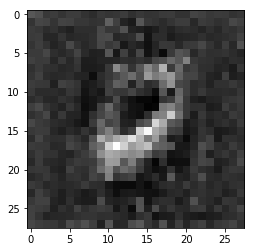

Epoch 1/2... Discriminator Loss: 1.2923... Generator Loss: 0.7931
Epoch 1/2... Discriminator Loss: 1.2979... Generator Loss: 0.7348
Epoch 1/2... Discriminator Loss: 1.3053... Generator Loss: 0.7474
Epoch 1/2... Discriminator Loss: 1.2738... Generator Loss: 0.7487
Epoch 1/2... Discriminator Loss: 1.2177... Generator Loss: 0.7684
Epoch 1/2... Discriminator Loss: 1.2987... Generator Loss: 0.7069
Epoch 1/2... Discriminator Loss: 1.2598... Generator Loss: 0.7223
Epoch 1/2... Discriminator Loss: 1.2369... Generator Loss: 0.7369
Epoch 1/2... Discriminator Loss: 1.2131... Generator Loss: 0.7540
Epoch 1/2... Discriminator Loss: 1.1967... Generator Loss: 0.7502


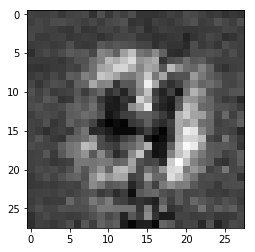

Epoch 1/2... Discriminator Loss: 1.1935... Generator Loss: 0.7711
Epoch 1/2... Discriminator Loss: 1.1143... Generator Loss: 0.8215
Epoch 1/2... Discriminator Loss: 1.1660... Generator Loss: 0.7919
Epoch 1/2... Discriminator Loss: 1.1056... Generator Loss: 0.8371
Epoch 1/2... Discriminator Loss: 1.1363... Generator Loss: 0.8288
Epoch 1/2... Discriminator Loss: 1.1501... Generator Loss: 0.8066
Epoch 1/2... Discriminator Loss: 1.1022... Generator Loss: 0.8386
Epoch 1/2... Discriminator Loss: 1.1152... Generator Loss: 0.8238
Epoch 1/2... Discriminator Loss: 1.0789... Generator Loss: 0.8692
Epoch 1/2... Discriminator Loss: 1.0666... Generator Loss: 0.8814


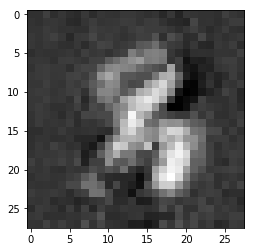

Epoch 1/2... Discriminator Loss: 1.0954... Generator Loss: 0.8523
Epoch 1/2... Discriminator Loss: 1.0795... Generator Loss: 0.8637
Epoch 1/2... Discriminator Loss: 1.0673... Generator Loss: 0.8712
Epoch 1/2... Discriminator Loss: 1.0724... Generator Loss: 0.8571
Epoch 1/2... Discriminator Loss: 1.0131... Generator Loss: 0.8796
Epoch 1/2... Discriminator Loss: 0.9987... Generator Loss: 0.9264
Epoch 2/2... Discriminator Loss: 0.9982... Generator Loss: 0.9458
Epoch 2/2... Discriminator Loss: 0.9539... Generator Loss: 1.0028
Epoch 2/2... Discriminator Loss: 0.9503... Generator Loss: 0.9862
Epoch 2/2... Discriminator Loss: 0.9929... Generator Loss: 0.9412


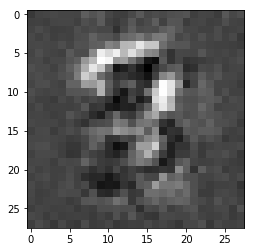

Epoch 2/2... Discriminator Loss: 0.9452... Generator Loss: 0.9922
Epoch 2/2... Discriminator Loss: 0.9372... Generator Loss: 0.9703
Epoch 2/2... Discriminator Loss: 0.8819... Generator Loss: 1.0637
Epoch 2/2... Discriminator Loss: 0.9080... Generator Loss: 1.0284
Epoch 2/2... Discriminator Loss: 0.8899... Generator Loss: 1.0105
Epoch 2/2... Discriminator Loss: 0.9172... Generator Loss: 1.0175
Epoch 2/2... Discriminator Loss: 0.8960... Generator Loss: 1.0312
Epoch 2/2... Discriminator Loss: 0.8561... Generator Loss: 0.9780
Epoch 2/2... Discriminator Loss: 0.8622... Generator Loss: 1.0048
Epoch 2/2... Discriminator Loss: 0.8350... Generator Loss: 0.9998


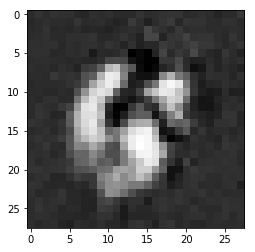

Epoch 2/2... Discriminator Loss: 0.8278... Generator Loss: 1.0773
Epoch 2/2... Discriminator Loss: 0.7792... Generator Loss: 1.1042
Epoch 2/2... Discriminator Loss: 0.8046... Generator Loss: 1.0167
Epoch 2/2... Discriminator Loss: 0.7514... Generator Loss: 1.2147
Epoch 2/2... Discriminator Loss: 0.8249... Generator Loss: 0.9506
Epoch 2/2... Discriminator Loss: 0.7808... Generator Loss: 0.9858
Epoch 2/2... Discriminator Loss: 0.7224... Generator Loss: 1.1813
Epoch 2/2... Discriminator Loss: 0.7253... Generator Loss: 1.1770
Epoch 2/2... Discriminator Loss: 0.6892... Generator Loss: 1.2254
Epoch 2/2... Discriminator Loss: 0.6548... Generator Loss: 1.1834


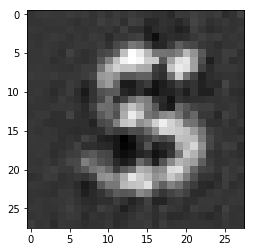

Epoch 2/2... Discriminator Loss: 0.6642... Generator Loss: 1.2877
Epoch 2/2... Discriminator Loss: 0.6580... Generator Loss: 1.3212
Epoch 2/2... Discriminator Loss: 0.6188... Generator Loss: 1.2795
Epoch 2/2... Discriminator Loss: 0.5963... Generator Loss: 1.2986
Epoch 2/2... Discriminator Loss: 0.5955... Generator Loss: 1.3399
Epoch 2/2... Discriminator Loss: 0.6238... Generator Loss: 1.2818
Epoch 2/2... Discriminator Loss: 0.5568... Generator Loss: 1.4046
Epoch 2/2... Discriminator Loss: 0.6064... Generator Loss: 1.3690
Epoch 2/2... Discriminator Loss: 0.5873... Generator Loss: 1.3466
Epoch 2/2... Discriminator Loss: 0.5789... Generator Loss: 1.2626


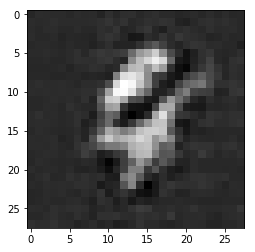

Epoch 2/2... Discriminator Loss: 0.5909... Generator Loss: 1.2652
Epoch 2/2... Discriminator Loss: 0.5436... Generator Loss: 1.4236
Epoch 2/2... Discriminator Loss: 0.5098... Generator Loss: 1.4949
Epoch 2/2... Discriminator Loss: 0.5440... Generator Loss: 1.4050
Epoch 2/2... Discriminator Loss: 0.5260... Generator Loss: 1.3750
Epoch 2/2... Discriminator Loss: 0.4932... Generator Loss: 1.5506
Epoch 2/2... Discriminator Loss: 0.4740... Generator Loss: 1.5823
Epoch 2/2... Discriminator Loss: 0.4923... Generator Loss: 1.5372
Epoch 2/2... Discriminator Loss: 0.4911... Generator Loss: 1.4367
Epoch 2/2... Discriminator Loss: 0.4840... Generator Loss: 1.8018


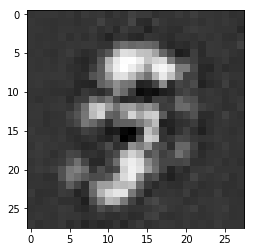

Epoch 2/2... Discriminator Loss: 0.4369... Generator Loss: 1.7548
Epoch 2/2... Discriminator Loss: 0.4750... Generator Loss: 1.6699
Epoch 2/2... Discriminator Loss: 0.4035... Generator Loss: 1.7127


In [93]:
batch_size = 128
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 4.3621... Generator Loss: 0.0205
Epoch 1/1... Discriminator Loss: 4.5449... Generator Loss: 0.0202
Epoch 1/1... Discriminator Loss: 4.5030... Generator Loss: 0.0230
Epoch 1/1... Discriminator Loss: 4.2287... Generator Loss: 0.0429
Epoch 1/1... Discriminator Loss: 3.9400... Generator Loss: 0.0694
Epoch 1/1... Discriminator Loss: 3.7767... Generator Loss: 0.0682
Epoch 1/1... Discriminator Loss: 3.0193... Generator Loss: 0.1578
Epoch 1/1... Discriminator Loss: 1.7356... Generator Loss: 1.1422
Epoch 1/1... Discriminator Loss: 2.7226... Generator Loss: 0.3431
Epoch 1/1... Discriminator Loss: 2.4949... Generator Loss: 0.3916


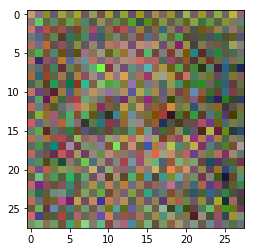

Epoch 1/1... Discriminator Loss: 2.4686... Generator Loss: 0.3952
Epoch 1/1... Discriminator Loss: 2.1724... Generator Loss: 0.4173
Epoch 1/1... Discriminator Loss: 2.0184... Generator Loss: 0.5263
Epoch 1/1... Discriminator Loss: 1.7047... Generator Loss: 0.5708
Epoch 1/1... Discriminator Loss: 1.9553... Generator Loss: 0.5169
Epoch 1/1... Discriminator Loss: 1.3550... Generator Loss: 0.8378
Epoch 1/1... Discriminator Loss: 1.3028... Generator Loss: 0.7689
Epoch 1/1... Discriminator Loss: 1.2210... Generator Loss: 0.8375
Epoch 1/1... Discriminator Loss: 0.9823... Generator Loss: 1.1070
Epoch 1/1... Discriminator Loss: 0.7239... Generator Loss: 1.3525


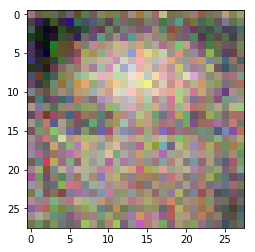

Epoch 1/1... Discriminator Loss: 1.0199... Generator Loss: 1.0848
Epoch 1/1... Discriminator Loss: 1.1049... Generator Loss: 0.8325
Epoch 1/1... Discriminator Loss: 1.1967... Generator Loss: 0.7472
Epoch 1/1... Discriminator Loss: 0.7649... Generator Loss: 1.3253
Epoch 1/1... Discriminator Loss: 0.6770... Generator Loss: 1.6114
Epoch 1/1... Discriminator Loss: 1.3310... Generator Loss: 0.7503
Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 0.6877
Epoch 1/1... Discriminator Loss: 0.4113... Generator Loss: 1.9631
Epoch 1/1... Discriminator Loss: 1.5912... Generator Loss: 0.5248
Epoch 1/1... Discriminator Loss: 1.2783... Generator Loss: 0.8450


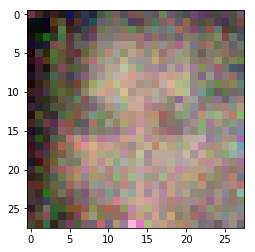

Epoch 1/1... Discriminator Loss: 1.0527... Generator Loss: 0.5991
Epoch 1/1... Discriminator Loss: 1.6630... Generator Loss: 0.5045
Epoch 1/1... Discriminator Loss: 1.7743... Generator Loss: 0.4674
Epoch 1/1... Discriminator Loss: 0.3361... Generator Loss: 6.5748
Epoch 1/1... Discriminator Loss: 0.4731... Generator Loss: 3.4637
Epoch 1/1... Discriminator Loss: 1.6088... Generator Loss: 0.5828
Epoch 1/1... Discriminator Loss: 1.7151... Generator Loss: 0.5056
Epoch 1/1... Discriminator Loss: 0.7680... Generator Loss: 1.7593
Epoch 1/1... Discriminator Loss: 0.8206... Generator Loss: 0.8177
Epoch 1/1... Discriminator Loss: 1.2443... Generator Loss: 0.6679


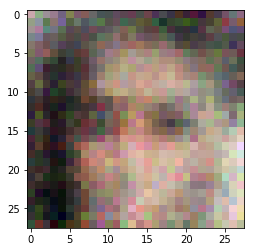

Epoch 1/1... Discriminator Loss: 1.6951... Generator Loss: 0.4981
Epoch 1/1... Discriminator Loss: 1.8326... Generator Loss: 0.4700
Epoch 1/1... Discriminator Loss: 0.3726... Generator Loss: 3.2716
Epoch 1/1... Discriminator Loss: 0.5302... Generator Loss: 1.5948
Epoch 1/1... Discriminator Loss: 0.7830... Generator Loss: 1.3870
Epoch 1/1... Discriminator Loss: 0.5990... Generator Loss: 1.3607
Epoch 1/1... Discriminator Loss: 0.4973... Generator Loss: 1.6914
Epoch 1/1... Discriminator Loss: 0.6288... Generator Loss: 1.3486
Epoch 1/1... Discriminator Loss: 0.6048... Generator Loss: 1.3632
Epoch 1/1... Discriminator Loss: 0.5553... Generator Loss: 1.2422


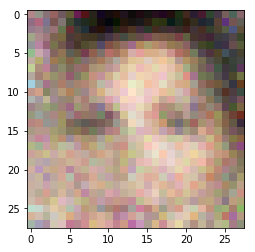

Epoch 1/1... Discriminator Loss: 0.4705... Generator Loss: 1.5404
Epoch 1/1... Discriminator Loss: 0.5813... Generator Loss: 1.3848
Epoch 1/1... Discriminator Loss: 0.5067... Generator Loss: 1.4262
Epoch 1/1... Discriminator Loss: 0.3204... Generator Loss: 2.1886
Epoch 1/1... Discriminator Loss: 0.4083... Generator Loss: 1.6739
Epoch 1/1... Discriminator Loss: 0.5133... Generator Loss: 1.4937
Epoch 1/1... Discriminator Loss: 0.3768... Generator Loss: 1.8665
Epoch 1/1... Discriminator Loss: 0.3517... Generator Loss: 2.1790
Epoch 1/1... Discriminator Loss: 0.3972... Generator Loss: 1.8300
Epoch 1/1... Discriminator Loss: 0.4228... Generator Loss: 1.5082


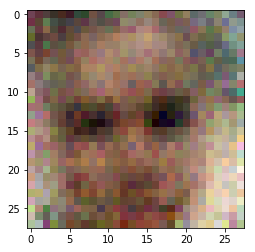

Epoch 1/1... Discriminator Loss: 0.4691... Generator Loss: 1.4598
Epoch 1/1... Discriminator Loss: 0.2368... Generator Loss: 2.2874
Epoch 1/1... Discriminator Loss: 0.2324... Generator Loss: 2.4996
Epoch 1/1... Discriminator Loss: 0.3439... Generator Loss: 3.4971
Epoch 1/1... Discriminator Loss: 0.4183... Generator Loss: 3.5172
Epoch 1/1... Discriminator Loss: 0.3664... Generator Loss: 2.3731
Epoch 1/1... Discriminator Loss: 0.8014... Generator Loss: 2.4517
Epoch 1/1... Discriminator Loss: 0.6444... Generator Loss: 2.4840
Epoch 1/1... Discriminator Loss: 0.3126... Generator Loss: 4.3616
Epoch 1/1... Discriminator Loss: 0.3780... Generator Loss: 2.3575


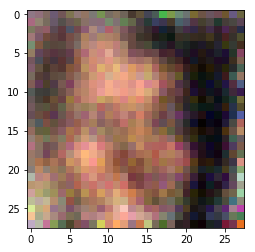

Epoch 1/1... Discriminator Loss: 0.5723... Generator Loss: 3.9288
Epoch 1/1... Discriminator Loss: 0.3047... Generator Loss: 2.3724
Epoch 1/1... Discriminator Loss: 0.3471... Generator Loss: 2.6788
Epoch 1/1... Discriminator Loss: 0.2589... Generator Loss: 2.2203
Epoch 1/1... Discriminator Loss: 0.8289... Generator Loss: 0.7722
Epoch 1/1... Discriminator Loss: 0.5293... Generator Loss: 1.4052
Epoch 1/1... Discriminator Loss: 0.8141... Generator Loss: 1.0035
Epoch 1/1... Discriminator Loss: 0.7924... Generator Loss: 0.8208
Epoch 1/1... Discriminator Loss: 1.2012... Generator Loss: 0.5377
Epoch 1/1... Discriminator Loss: 0.4778... Generator Loss: 1.6086


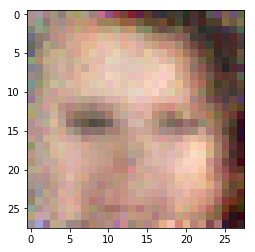

Epoch 1/1... Discriminator Loss: 1.6752... Generator Loss: 0.2457
Epoch 1/1... Discriminator Loss: 0.3455... Generator Loss: 3.2023
Epoch 1/1... Discriminator Loss: 0.3276... Generator Loss: 2.0700
Epoch 1/1... Discriminator Loss: 0.7568... Generator Loss: 2.2599
Epoch 1/1... Discriminator Loss: 0.4676... Generator Loss: 1.5455
Epoch 1/1... Discriminator Loss: 0.8955... Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 0.3603... Generator Loss: 2.5428
Epoch 1/1... Discriminator Loss: 0.4712... Generator Loss: 1.5048
Epoch 1/1... Discriminator Loss: 0.5530... Generator Loss: 1.3085
Epoch 1/1... Discriminator Loss: 0.3548... Generator Loss: 3.0369


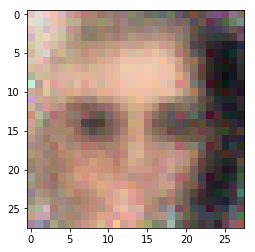

Epoch 1/1... Discriminator Loss: 0.9591... Generator Loss: 0.7333
Epoch 1/1... Discriminator Loss: 0.2881... Generator Loss: 2.8158
Epoch 1/1... Discriminator Loss: 0.3367... Generator Loss: 1.7119
Epoch 1/1... Discriminator Loss: 0.6795... Generator Loss: 1.6484
Epoch 1/1... Discriminator Loss: 0.8614... Generator Loss: 0.7994
Epoch 1/1... Discriminator Loss: 0.8010... Generator Loss: 0.8277
Epoch 1/1... Discriminator Loss: 0.2972... Generator Loss: 3.5425
Epoch 1/1... Discriminator Loss: 0.3796... Generator Loss: 2.0411
Epoch 1/1... Discriminator Loss: 0.6228... Generator Loss: 1.6901
Epoch 1/1... Discriminator Loss: 0.4169... Generator Loss: 2.1327


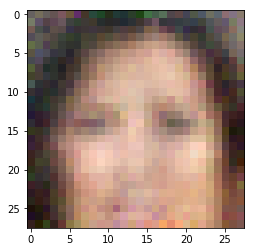

Epoch 1/1... Discriminator Loss: 0.4148... Generator Loss: 2.8734
Epoch 1/1... Discriminator Loss: 0.4207... Generator Loss: 1.4793
Epoch 1/1... Discriminator Loss: 0.6382... Generator Loss: 1.0237
Epoch 1/1... Discriminator Loss: 0.6621... Generator Loss: 1.1307
Epoch 1/1... Discriminator Loss: 1.0286... Generator Loss: 0.5716
Epoch 1/1... Discriminator Loss: 0.9089... Generator Loss: 0.7927
Epoch 1/1... Discriminator Loss: 1.0654... Generator Loss: 0.6875
Epoch 1/1... Discriminator Loss: 0.5651... Generator Loss: 1.5312
Epoch 1/1... Discriminator Loss: 0.4874... Generator Loss: 1.3410
Epoch 1/1... Discriminator Loss: 0.4917... Generator Loss: 1.8090


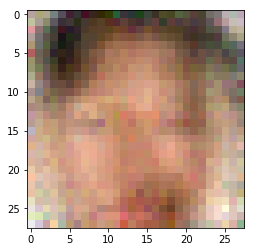

Epoch 1/1... Discriminator Loss: 0.5360... Generator Loss: 1.3362
Epoch 1/1... Discriminator Loss: 0.6316... Generator Loss: 1.1621
Epoch 1/1... Discriminator Loss: 0.3924... Generator Loss: 2.0446
Epoch 1/1... Discriminator Loss: 0.5914... Generator Loss: 1.1087
Epoch 1/1... Discriminator Loss: 2.1111... Generator Loss: 0.1547
Epoch 1/1... Discriminator Loss: 0.3730... Generator Loss: 2.8382
Epoch 1/1... Discriminator Loss: 1.0862... Generator Loss: 0.8116
Epoch 1/1... Discriminator Loss: 0.3024... Generator Loss: 4.1048
Epoch 1/1... Discriminator Loss: 0.4912... Generator Loss: 3.2270
Epoch 1/1... Discriminator Loss: 0.4571... Generator Loss: 1.9995


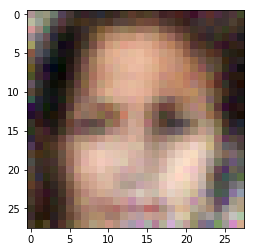

Epoch 1/1... Discriminator Loss: 0.3923... Generator Loss: 2.5294
Epoch 1/1... Discriminator Loss: 0.8436... Generator Loss: 1.6538
Epoch 1/1... Discriminator Loss: 0.9117... Generator Loss: 0.7614
Epoch 1/1... Discriminator Loss: 1.4803... Generator Loss: 0.3640
Epoch 1/1... Discriminator Loss: 1.0379... Generator Loss: 0.7059
Epoch 1/1... Discriminator Loss: 0.5060... Generator Loss: 1.5934
Epoch 1/1... Discriminator Loss: 0.5091... Generator Loss: 2.3217
Epoch 1/1... Discriminator Loss: 1.3844... Generator Loss: 0.4126
Epoch 1/1... Discriminator Loss: 1.9434... Generator Loss: 0.1978
Epoch 1/1... Discriminator Loss: 0.6257... Generator Loss: 1.3622


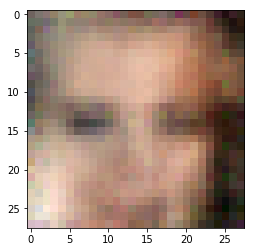

Epoch 1/1... Discriminator Loss: 2.0822... Generator Loss: 0.1714
Epoch 1/1... Discriminator Loss: 0.2880... Generator Loss: 3.2092
Epoch 1/1... Discriminator Loss: 0.6835... Generator Loss: 1.1914
Epoch 1/1... Discriminator Loss: 0.3671... Generator Loss: 3.9060
Epoch 1/1... Discriminator Loss: 0.4114... Generator Loss: 1.8705
Epoch 1/1... Discriminator Loss: 0.3992... Generator Loss: 3.7215
Epoch 1/1... Discriminator Loss: 0.3978... Generator Loss: 3.5681
Epoch 1/1... Discriminator Loss: 0.4178... Generator Loss: 2.4663
Epoch 1/1... Discriminator Loss: 0.2814... Generator Loss: 3.6098
Epoch 1/1... Discriminator Loss: 0.9354... Generator Loss: 1.5622


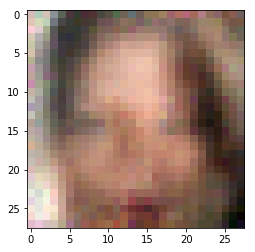

Epoch 1/1... Discriminator Loss: 0.2502... Generator Loss: 6.3400
Epoch 1/1... Discriminator Loss: 0.5621... Generator Loss: 2.0080
Epoch 1/1... Discriminator Loss: 0.3653... Generator Loss: 2.8365
Epoch 1/1... Discriminator Loss: 0.3160... Generator Loss: 3.5113
Epoch 1/1... Discriminator Loss: 0.4751... Generator Loss: 3.0755
Epoch 1/1... Discriminator Loss: 0.2765... Generator Loss: 5.7198
Epoch 1/1... Discriminator Loss: 0.8718... Generator Loss: 0.8829
Epoch 1/1... Discriminator Loss: 0.7992... Generator Loss: 1.5714
Epoch 1/1... Discriminator Loss: 0.3856... Generator Loss: 2.2359
Epoch 1/1... Discriminator Loss: 0.3749... Generator Loss: 2.4006


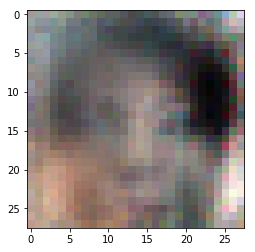

Epoch 1/1... Discriminator Loss: 0.3612... Generator Loss: 2.7096
Epoch 1/1... Discriminator Loss: 0.3795... Generator Loss: 3.5380
Epoch 1/1... Discriminator Loss: 0.9808... Generator Loss: 1.7099
Epoch 1/1... Discriminator Loss: 0.4718... Generator Loss: 2.2940
Epoch 1/1... Discriminator Loss: 0.3213... Generator Loss: 2.4466
Epoch 1/1... Discriminator Loss: 0.8229... Generator Loss: 0.7875
Epoch 1/1... Discriminator Loss: 0.6373... Generator Loss: 1.4031
Epoch 1/1... Discriminator Loss: 0.5265... Generator Loss: 2.1424


In [95]:
batch_size = 128
z_dim = 100
learning_rate = 0.0001
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.